# **Title of Project**

Handwritten Digit Prediction


A project to classify handwritten digits using machine learning techniques.


-------------

## **Objective**


The objective of this project is to build a machine learning model capable of recognizing handwritten digits (0-9) from image data, using the MNIST dataset.



The dataset used is the MNIST dataset, which is publicly available and can be loaded directly using TensorFlow/Keras.


## **Import Library**

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


## **Import Data**

In [2]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


## **Describe Data**

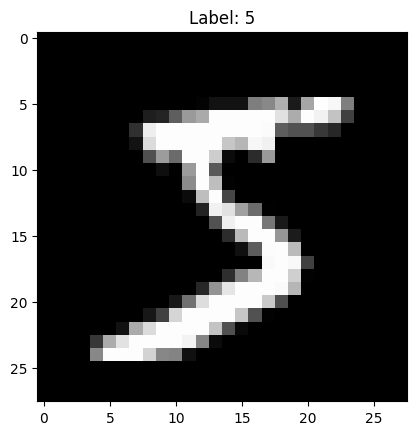

Pixel range: 0 to 255
Number of unique labels: 10


In [3]:

# Display a sample image
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

# Check data statistics
print(f"Pixel range: {X_train.min()} to {X_train.max()}")
print(f"Number of unique labels: {len(np.unique(y_train))}")


## **Data Visualization**

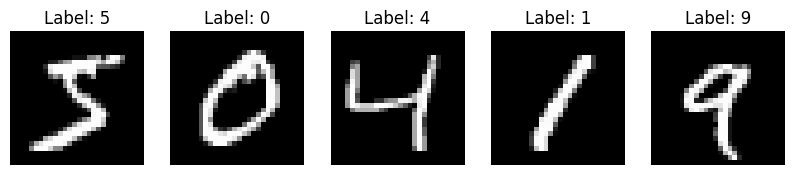

In [4]:

# Plot multiple images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()


## **Data Preprocessing**

In [5]:

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


## **Define Target Variable (y) and Feature Variables (X)**

In [6]:

# X is already preprocessed images, and y is one-hot encoded labels.
print(f"Feature shape: {X_train.shape}, Target shape: {y_train.shape}")


Feature shape: (60000, 28, 28, 1), Target shape: (60000, 10)


## **Train Test Split**

The MNIST dataset already has predefined training and testing sets. No additional split is needed.

## **Modeling**

In [10]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## **Model Evaluation**

In [8]:

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.8709 - loss: 0.4159 - val_accuracy: 0.9810 - val_loss: 0.0645
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.9821 - loss: 0.0557 - val_accuracy: 0.9863 - val_loss: 0.0512
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.9881 - loss: 0.0381 - val_accuracy: 0.9877 - val_loss: 0.0479
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9915 - loss: 0.0274 - val_accuracy: 0.9881 - val_loss: 0.0426
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.9928 - loss: 0.0212 - val_accuracy: 0.9902 - val_loss: 0.0368
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9881 - loss: 0.0336
Test Loss: 0.02852201834321022, Test Accuracy: 0.991100013256073


# Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Label: 7, Actual Label: 7


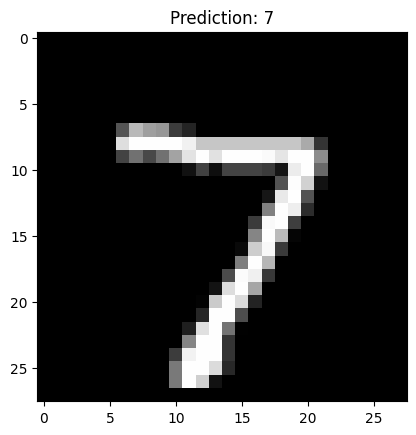

In [9]:

# Predict on a test image
pred = model.predict(X_test[0].reshape(1, 28, 28, 1))
predicted_label = np.argmax(pred)
actual_label = np.argmax(y_test[0])

print(f"Predicted Label: {predicted_label}, Actual Label: {actual_label}")

# Display the image
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Prediction: {predicted_label}")
plt.show()


## **Explaination**


The Convolutional Neural Network (CNN) achieves high accuracy by identifying spatial hierarchies in images. It uses convolutional layers to extract features, pooling layers to reduce dimensionality, and fully connected layers to predict the digit. The model is trained to minimize categorical cross-entropy loss.
